# Домашняя работа 9

Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

Данные были извлечены с сайта https://www.sports.ru/football/club/
В этом датасете собрана информация о футбольных клубах, необходимо разделить количество подписчиков клубов по категориям: High, Megium, Low, Zero. 
Мы разделим датасет на несколько частей: в первой части мы проведем разметку с помощью правил для разметки, во второй части проведем разметку в Label Studio.

In [139]:
import pandas as pd
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

In [140]:
data = pd.read_csv("football.csv")

In [141]:
data.head()

,num,name,city,country,coach,count_f,url
0,28,Валенсия,Валенсия,Испания,Рубен Бараха,10900,https://www.sports.ru/football/club/valencia/
1,25,Рубин,Казань,Россия,Рашид Рахимов,17003,https://www.sports.ru/football/club/rubin/
2,29,Крылья Советов,Самара,Россия,Игорь Осинькин,10400,https://www.sports.ru/football/club/krylia-sov...
3,26,Монако,Монако,Монако,Ади Хюттер,14334,https://www.sports.ru/football/club/monaco/
4,30,Анжи,Махачкала,Россия,NaN,10352,https://www.sports.ru/football/club/anzhi/


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9702 entries, 0 to 9701
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   num      9702 non-null   int64 
 1   name     9702 non-null   object
 2   city     2980 non-null   object
 3   country  9699 non-null   object
 4   coach    299 non-null    object
 5   count_f  9702 non-null   int64 
 6   url      9702 non-null   object
dtypes: int64(2), object(5)
memory usage: 530.7+ KB


Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [143]:
# Разделение датасета на две выборки
data = shuffle(data)
data_hand, data_auto = train_test_split(data, train_size=0.01, random_state=42)
data_hand.to_csv("football_train.csv", header=True, index=False)

In [144]:
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9605 entries, 8812 to 1764
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   num      9605 non-null   int64 
 1   name     9605 non-null   object
 2   city     2953 non-null   object
 3   country  9602 non-null   object
 4   coach    296 non-null    object
 5   count_f  9605 non-null   int64 
 6   url      9605 non-null   object
dtypes: int64(2), object(5)
memory usage: 600.3+ KB


<Axes: >

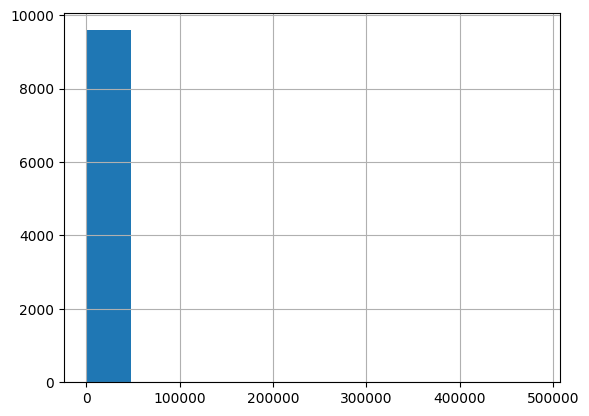

In [145]:
data_auto["count_f"].hist()

In [146]:
def rule_based_labeling(row):
    if row['count_f'] >=5_000:
        return "High"
    elif 20 <= row['count_f'] < 5_000:
        return "Medium"
    elif 1<= row['count_f']< 20:
        return "Low"
    else:
        return "Zero" 

In [157]:
data_auto["sentiment"] = data.apply(rule_based_labeling, axis=1)

In [158]:
data_auto.head()

,num,name,city,country,coach,count_f,url,sentiment
8812,8853,Трелиссак,NaN,Франция,NaN,0,https://www.sports.ru/football/club/trelissac/,Zero
7542,7574,Уиттон,NaN,Англия,NaN,0,https://www.sports.ru/football/club/whitton/,Zero
9188,9279,Мерелиненсе,NaN,Португалия,NaN,0,https://www.sports.ru/football/club/merelinense/,Zero
2087,2022,Копенгаген U-19,Копенгаген,Дания,NaN,6,https://www.sports.ru/football/club/copenhagen...,Low
8858,8916,Сент-Никлас,NaN,Бельгия,NaN,0,https://www.sports.ru/football/club/sportkring...,Zero


<Axes: >

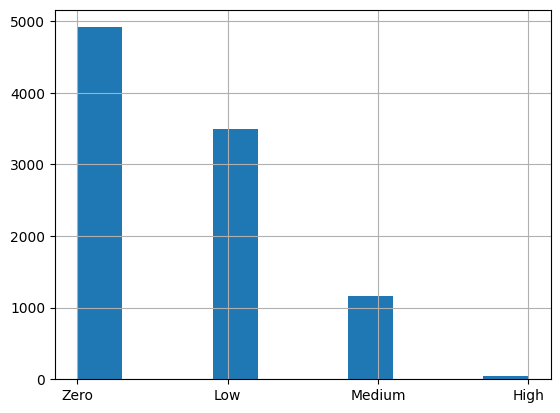

In [159]:
data_auto["sentiment"].hist()

Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

pip install label-studio

label-studio

localhost:8081/projects

![img1]('ls-1.png')
![img2]('ls-2.png')
![img3]('ls-3.png')


Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [160]:
data_modified = pd.read_csv("project.csv")

In [161]:
data_modified.head()

,annotation_id,annotator,city,coach,count_f,country,created_at,id,lead_time,name,num,sentiment,updated_at,url
0,1,1,NaN,NaN,1,Италия,2024-11-04T10:38:14.635006Z,1,3.111,Фермана,3698,Low,2024-11-04T10:38:14.635006Z,https://www.sports.ru/football/club/fermana/
1,2,1,NaN,NaN,26,Швейцария,2024-11-04T10:38:25.046265Z,2,4.997,Лозанна,1037,Medium,2024-11-04T10:38:25.046265Z,https://www.sports.ru/football/club/lausanne-s...
2,3,1,NaN,NaN,0,Бельгия,2024-11-04T10:38:28.362872Z,3,2.354,Пютте,7167,Zero,2024-11-04T10:38:28.362872Z,https://www.sports.ru/football/club/kfc-putte/
3,4,1,NaN,NaN,0,Германия,2024-11-04T10:38:35.737103Z,4,2.857,Хаштедт,5789,Zero,2024-11-04T10:38:35.737103Z,https://www.sports.ru/football/club/hastedt/
4,5,1,NaN,NaN,1,Бразилия,2024-11-04T10:38:39.026389Z,5,2.147,Демократа,3745,Low,2024-11-04T10:38:39.026389Z,https://www.sports.ru/football/club/democrata/


In [163]:
data_modified = data_modified[["num", "city", "country", "coach", "count_f", "url", "sentiment"]]

In [164]:
data_modified.head()

,num,city,country,coach,count_f,url,sentiment
0,3698,NaN,Италия,NaN,1,https://www.sports.ru/football/club/fermana/,Low
1,1037,NaN,Швейцария,NaN,26,https://www.sports.ru/football/club/lausanne-s...,Medium
2,7167,NaN,Бельгия,NaN,0,https://www.sports.ru/football/club/kfc-putte/,Zero
3,5789,NaN,Германия,NaN,0,https://www.sports.ru/football/club/hastedt/,Zero
4,3745,NaN,Бразилия,NaN,1,https://www.sports.ru/football/club/democrata/,Low


In [165]:
data_result = pd.concat([data_auto, data_modified])

In [166]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9702 entries, 8812 to 96
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   num        9702 non-null   int64 
 1   name       9605 non-null   object
 2   city       2985 non-null   object
 3   country    9699 non-null   object
 4   coach      297 non-null    object
 5   count_f    9702 non-null   int64 
 6   url        9702 non-null   object
 7   sentiment  9702 non-null   object
dtypes: int64(2), object(6)
memory usage: 682.2+ KB


In [168]:
data_result.head()

,num,name,city,country,coach,count_f,url,sentiment
8812,8853,Трелиссак,NaN,Франция,NaN,0,https://www.sports.ru/football/club/trelissac/,Zero
7542,7574,Уиттон,NaN,Англия,NaN,0,https://www.sports.ru/football/club/whitton/,Zero
9188,9279,Мерелиненсе,NaN,Португалия,NaN,0,https://www.sports.ru/football/club/merelinense/,Zero
2087,2022,Копенгаген U-19,Копенгаген,Дания,NaN,6,https://www.sports.ru/football/club/copenhagen...,Low
8858,8916,Сент-Никлас,NaN,Бельгия,NaN,0,https://www.sports.ru/football/club/sportkring...,Zero


Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [173]:
data_result = shuffle(data_result)
data_result["sentiment_num"] = data_result['sentiment'].replace({'Zero': 0, 'Low': 1, 'Medium':2, 'High':3})
labeled_data, unlabeled_data = train_test_split(data_result, train_size=0.2, random_state=42)

C:\Users\Nata44845\AppData\Local\Temp\ipykernel_1372\1073834131.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_result["sentiment_num"] = data_result['sentiment'].replace({'Zero': 0, 'Low': 1, 'Medium':2, 'High':3})


In [174]:
labeled_data.head()

,num,name,city,country,coach,count_f,url,sentiment,sentiment_num
4040,3665,Виктория Николаевка,NaN,Украина,NaN,1,https://www.sports.ru/football/club/viktoriya-...,Low,1
579,402,Анжи-Юниор,Зеленодольск,Россия,NaN,151,https://www.sports.ru/football/club/anzhi-junior/,Medium,2
4462,4459,Алжуштреленсе,Алжуштрел,Португалия,NaN,1,https://www.sports.ru/football/club/sporte-min...,Low,1
9418,9493,Агротикос Астерас,Салоники,Греция,NaN,0,https://www.sports.ru/football/club/pmas-agrot...,Zero,0
3765,3829,Сукхотхай,NaN,Таиланд,NaN,1,https://www.sports.ru/football/club/sukhothai/,Low,1


In [184]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_data):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = labeled_data[['count_f']]
    y = labeled_data['sentiment_num']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

# Обучение начальной модели на небольшом наборе 
model, vectorizer = train_model(labeled_data)

# Использование исходной модели для прогнозирования настроения неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_data['count_f'])
y_unlabeled_predicted = model.predict(X_unlabeled)


c:\Nata\GeekBrains\gb-git\data_extract_parsing\venv_data_parsing\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NotFittedError: The TF-IDF vectorizer is not fitted

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.